# Wilson-Cowan Model Class Exercise - Due to Glow 11:59PM Oct 31st

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Let's consider the Wilson-Cowan system:

\begin{aligned}
\tau_E \frac{d r_E}{dt} &= - r_E + f_E(w_{EE}r_E + w_{EI}r_I + I_E) \\
\tau_I \frac{d r_I}{dt} &= - r_I + f_I(w_{IE}r_E + w_{II}r_I + I_I)
\end{aligned}

Fill out the functions below to simulate this Wilson-Cowan system using the following parameters:

$w_{EE} = 6.4$, $w_{EI}=-4.8$, $w_{IE}=6$,$w_{II}=-1.2$, $I_E = 0.8$, $I_I = 0.0$

$\tau_E=1$, $\tau_I = 2$, $a_E = 1.2$, $\theta_E=2.8$, $a_I = 1$, $\theta_I = 4$

We will use the sigmoid transfer function ($a$ is gain):

$f(x) = (1+e^{-gain(x-\theta)})^{-1}$

Use $dt = 0.1$ and $T = 200$. Plot the solution in phase space meaning that the horizontal axis be $r_E(t)$ and the vertical axis be $r_I(t)$. Include the direction field. Add in the nullclines for the system. Remember, the nullclines are the curves in phase space where where $\dot{r_E}=0$ and $\dot{r_I} = 0$. If our phase space is $r_E(t)$ vs $r_I(t)$, our nullclines must be transformed into a form where we can determine the respective $r_I(t)$ values along each nullcline for $r_E(t)$ input as our domain. In general, the nullclines take the form:

$r_j = f_j(w_{jj}r_j+w_{ji}r_i+I_j)$

We can solve this such that $r_j$ is on one side and $r_i$ is on the other:

$\bigg(\theta_j - w_{jj}r_j-I_j-\frac{1}{a_j}\log(\frac{1-r_j}{r_j})\bigg)/w_{ji} = r_i$

Feel free to adjust any functions or structure to the code that fits your style of programming. Your figure should look like the following:

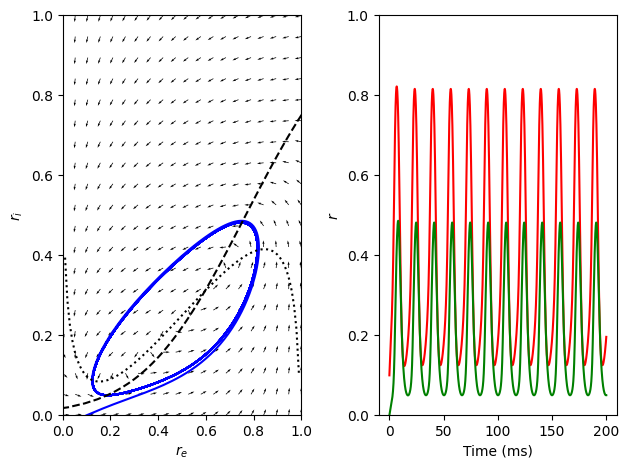

In [39]:
def sigmoid(x, gain=3, threshold=1):
    """Transfer Function for WC Model"""
    return (1 / (1 + np.exp(-gain*(x - threshold))))


def drdt(
    r,
    w_ee=6.4,
    w_ei=-4.8,
    w_ie=6,
    w_ii=-1.2,
    tau_e=1,
    tau_i=2,
    I_e=0.8,
    I_i=0,
    gain_e=1.2,
    gain_i=1,
    theta_e=2.8,
    theta_i=4,
):
    """Dynamics of WC Model"""
    re, ri = r
    dredt = (-re + sigmoid(w_ee*re + w_ei*ri+I_e, gain=gain_e, threshold=theta_e)) / tau_e
    dridt = (-ri + sigmoid(w_ie*re + w_ii*ri+I_i, gain=gain_i, threshold=theta_i)) / tau_i
    return np.array([dredt, dridt], dtype=np.float64)


def E_nullcline(r,
    w_ee=6.4,
    w_ei=-4.8,
    w_ie=6,
    w_ii=-1.2,
    tau_e=1,
    tau_i=2,
    I_e=0.8,
    I_i=0,
    gain_e=1.2,
    gain_i=1,
    theta_e=2.8,
    theta_i=4,):
    """Returns the nullcline values for drE/dt = 0 as a function of rE"""
    # For values of RE return values of RI
    return (theta_e - w_ee*r - I_e - (1/gain_e)*np.log((1-r)/r)) / w_ei


def I_nullcline(r,
    w_ee=6.4,
    w_ei=-4.8,
    w_ie=6,
    w_ii=-1.2,
    tau_e=1,
    tau_i=2,
    I_e=0.8,
    I_i=0,
    gain_e=1.2,
    gain_i=1,
    theta_e=2.8,
    theta_i=4,):
    """Returns the nullcline values for drI/dt = 0 as a function of rI"""
    # For values of RI, return values of RE
    return (theta_i - w_ii*r - I_i - (1/gain_i)*np.log((1-r)/r)) / w_ie


def dir_field(
    N=20,
    w_ee=6.4,
    w_ei=-4.8,
    w_ie=6,
    w_ii=-1.2,
    tau_e=1,
    tau_i=2,
    I_e=0.8,
    I_i=0,
    gain_e=1.2,
    gain_i=1,
    theta_e=2.8,
    theta_i=4,
):
    """Returns direction field, the local dynamics at each point of some grid in phase space"""
    # Use meshgrid to create a [0,1] by [0,1], NxN grid
    RE, RI = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))

    # Determine the rate of change in the RE direction at all points
    dRE = (
        -RE + sigmoid(w_ee * RE + w_ei * RI + I_e, gain=gain_e, threshold=theta_e)
    ) / tau_e

    # Determine the rate of change in the RI direciton at all points
    dRI = (
        -RI + sigmoid(w_ie * RE + w_ii * RI + I_i, gain=gain_i, threshold=theta_i)
    ) / tau_i

    # Normalize the rate of change
    d_norm = np.sqrt(dRE**2 + dRI**2)

    # Return the gride spacing by the meshgrid and the normalized rate of change in RE and RI
    return RE, RI, dRE / d_norm, dRI / d_norm

/tmp/ipykernel_417288/3767231914.py:61: RuntimeWarning: divide by zero encountered in divide
  return (theta_i - w_ii*r - I_i - (1/gain_i)*np.log((1-r)/r)) / w_ie
/tmp/ipykernel_417288/3767231914.py:61: RuntimeWarning: divide by zero encountered in log
  return (theta_i - w_ii*r - I_i - (1/gain_i)*np.log((1-r)/r)) / w_ie
/tmp/ipykernel_417288/3767231914.py:43: RuntimeWarning: divide by zero encountered in divide
  return (theta_e - w_ee*r - I_e - (1/gain_e)*np.log((1-r)/r)) / w_ei
/tmp/ipykernel_417288/3767231914.py:43: RuntimeWarning: divide by zero encountered in log
  return (theta_e - w_ee*r - I_e - (1/gain_e)*np.log((1-r)/r)) / w_ei


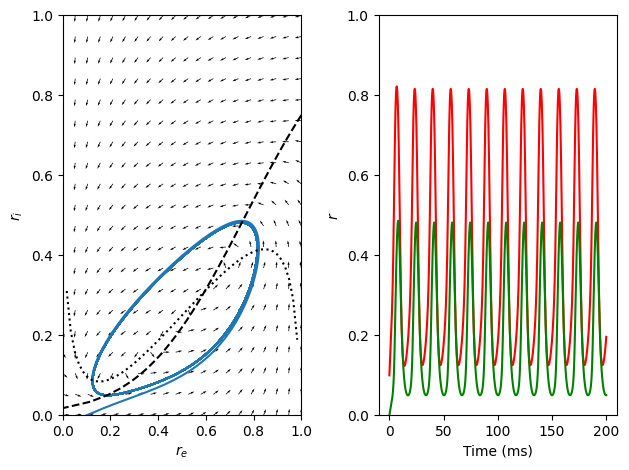

In [44]:
# set up the WC system with the appropriate parameters
w_ee = 6.4
w_ei = -4.8
w_ie = 6
w_ii = -1.2
tau_e = 1
tau_i = 2
I_e = 0.8
I_i = 0
gain_e = 1.2
gain_i = 1
theta_e = 2.8
theta_i = 4
T = 200
dt = 0.1
time = np.arange(0, T + dt, dt)
r_vals = np.zeros((time.shape[0], 2))
r_vals[0] = np.asarray([0.1, 0])

# Simulate the WC system
for i in range(1, time.shape[0]):
    # Forward Euler using drdt
    drdt_vals = drdt((r_vals[i-1,0],r_vals[i-1,1]))
    # print(drdt_vals)
    r_vals[i] = r_vals[i-1] + dt*drdt_vals
    # r_vals[i] = [r_vals[i-1,0] + d*dt, r_vals[i-1,1] + dridt*dt]

# Determine the nullclines
# Use r_null as the input R value for the nullclines
# Then how would you plot it?
# avoid the divide by zero error
r_null = np.linspace(0, 1, 60)
I_nullcline_ys = I_nullcline(r_null)
E_nullcline_ys = E_nullcline(r_null)
# I_nullcline_ys = [I_nullcline(r) for r in r_null]
# E_nullcline_ys = [E_nullcline(r) for r in r_null]

# Determine the direction field
RE, RI, dRE, dRI = dir_field()

fig, ax = plt.subplots(1, 2, tight_layout=True)
# Plot trajectory
ax[0].plot(r_vals[:,0], r_vals[:,1])

# Plot E nullcline
ax[0].plot(r_null, E_nullcline_ys, color="k", ls=":")

# Plot I nullcline (set color to "k" and ls="--")
ax[0].plot(I_nullcline_ys, r_null, color="k", ls="--")

# Plot direction field (nothing to change here assuming dir_field is correct)
ax[0].quiver(RE, RI, dRE, dRI)

# Plot time series of r_e(t) and r_i(t) on second axis
ax[1].plot(time, r_vals[:,0], color="r")
ax[1].plot(time, r_vals[:,1], color="g")


### NO NEED TO EDIT ANYTHING BELOW HERE ####
# Label and set plot limits
ax[0].set_ylim([0, 1])
ax[0].set_xlim([0, 1])
ax[0].set_xlabel("$r_e$")
ax[0].set_ylabel("$r_i$")

# Label and set plot limits
ax[1].set_ylim([0, 1])
ax[1].set_ylabel("$r$")
ax[1].set_xlabel("Time (ms)")

plt.show()